# Develop Cat dog image classification using CNN

# Steps
1. Load your data
2. Data proper structure
3. Create Training data and test data-loading the data from dir.
4. Create CNN model
5. Compile, run , evaluate model

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CNN_FILES_DS_US/training_set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CNN_FILES_DS_US/test_set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

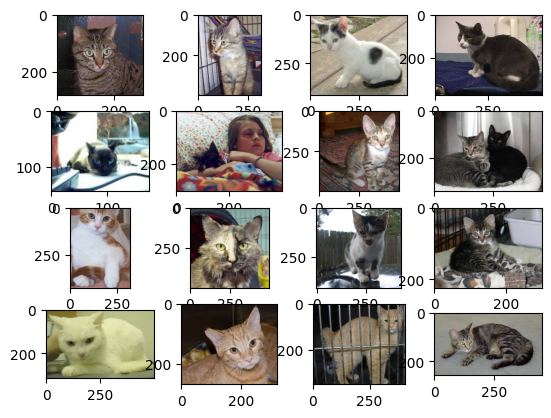

In [ ]:
# print some images
import matplotlib.pyplot as plt
from matplotlib.image import imread

Folder='/content/training_set/cats/'

for i in range(16):
  plt.subplot(4,4,i+1) #plt.subplot(3,3,1)
  filename=Folder+'cat.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)

plt.show()

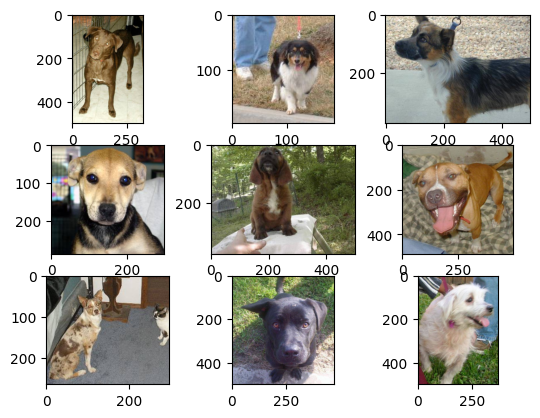

In [ ]:
# print some images
import matplotlib.pyplot as plt
from matplotlib.image import imread

Folder='/content/training_set/dogs/'

for i in range(9):
  plt.subplot(330+1+i)
  filename=Folder+'dog.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)

plt.show()

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2023 files belonging to 2 classes.


normalize the images into 0 to 1

In [17]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# 1. Create CNN Architecture

In [19]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

input shape-(kernel size-1)
256-(3-1)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
251/251 [==============================] - 38s 110ms/step - loss: 2.1895 - accuracy: 0.5494 - val_loss: 0.8910 - val_accuracy: 0.4869
Epoch 2/3
251/251 [==============================] - 27s 106ms/step - loss: 0.6888 - accuracy: 0.5975 - val_loss: 0.6420 - val_accuracy: 0.6485
Epoch 3/3
251/251 [==============================] - 27s 108ms/step - loss: 0.6159 - accuracy: 0.6740 - val_loss: 0.8216 - val_accuracy: 0.6728


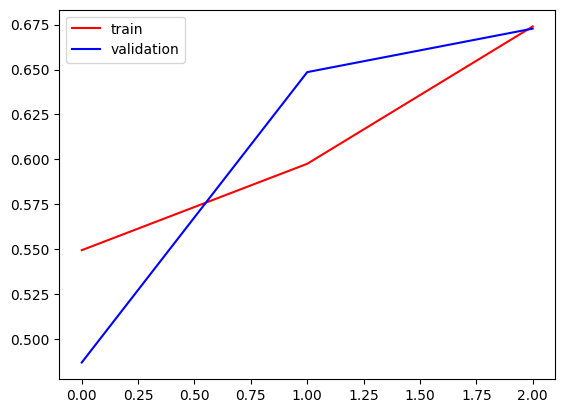

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

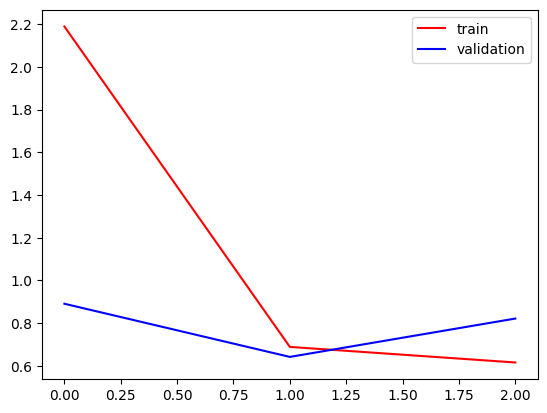

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
# accuracy
model.evaluate(train_ds)

251/251 [==============================] - 23s 90ms/step - loss: 0.7784 - accuracy: 0.6750


[0.7783932089805603, 0.6749531626701355]

In [27]:
# accuracy
model.evaluate(validation_ds)

64/64 [==============================] - 3s 45ms/step - loss: 0.8216 - accuracy: 0.6728


[0.8215860724449158, 0.6727632284164429]

In [28]:
# save the model
model.save('Cat_dog_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [29]:
import cv2

In [30]:
test_img = cv2.imread('/content/dog.jpeg')

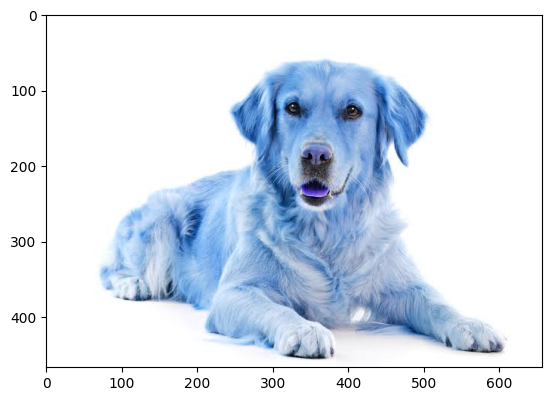

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(467, 657, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 1s 504ms/step


array([[0.]], dtype=float32)

In [ ]:
pre train models